In [65]:
import re
import string
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [49]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

In [50]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_html("https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html")[0]
df = df[["Age","Race","County"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     578 non-null    int64 
 1   Race    578 non-null    object
 2   County  578 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.7+ KB


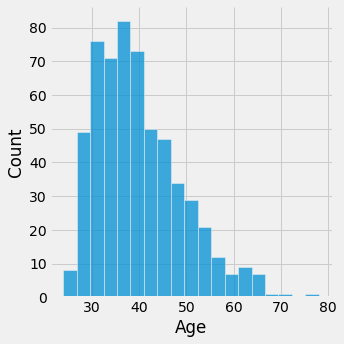

In [51]:
sns.displot(df["Age"])

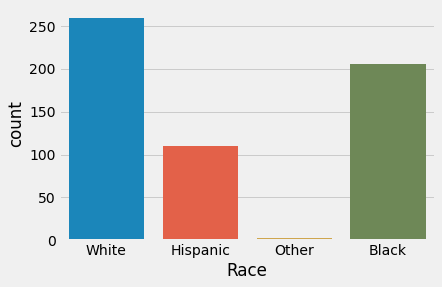

In [52]:
sns.countplot(df["Race"])

In [53]:
from google.colab import files
uploaded = files.upload()

Saving prisonerstatement.csv to prisonerstatement (1).csv


In [54]:
import io
data = pd.read_csv(io.BytesIO(uploaded["prisonerstatement.csv"]))
data['last statement']

0      Statement to the Media: I, at this very moment...
1      What is about to transpire in a few moments is...
2      When asked if he had a last statement, he repl...
3      I pray that my family will rejoice and will fo...
4      Heavenly Father, I give thanks for this time, ...
                             ...                        
472    Ok to start with I would like to thank everyon...
473    I would like to thank my  Jesus Christ my Lord...
474    I just want to say to  the family of Pablo Cas...
475    Yes, I just want to  thank (pause) I don’t wan...
476    I want to take this moment to be shared with e...
Name: last statement, Length: 477, dtype: object

In [55]:
data = data.astype({'last statement':'string'})

In [56]:
data["text"] = data["last statement"]

In [57]:
data["text"]

0      Statement to the Media: I, at this very moment...
1      What is about to transpire in a few moments is...
2      When asked if he had a last statement, he repl...
3      I pray that my family will rejoice and will fo...
4      Heavenly Father, I give thanks for this time, ...
                             ...                        
472    Ok to start with I would like to thank everyon...
473    I would like to thank my  Jesus Christ my Lord...
474    I just want to say to  the family of Pablo Cas...
475    Yes, I just want to  thank (pause) I don’t wan...
476    I want to take this moment to be shared with e...
Name: text, Length: 477, dtype: string

In [58]:
data.dropna(inplace=True)

In [59]:
data.isnull().sum()


web-scraper-order        0
web-scraper-start-url    0
link                     0
link-href                0
last statement           0
text                     0
dtype: int64

In [61]:
data['sentiment_scores'] = data['text'].apply(lambda text: sid.polarity_scores(text))
data.head()

,web-scraper-order,web-scraper-start-url,link,link-href,last statement,text,sentiment_scores
0,1672902707-1,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"Statement to the Media: I, at this very moment...","Statement to the Media: I, at this very moment...","{'neg': 0.104, 'neu': 0.872, 'pos': 0.023, 'co..."
1,1672902711-2,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/o...,What is about to transpire in a few moments is...,What is about to transpire in a few moments is...,"{'neg': 0.103, 'neu': 0.639, 'pos': 0.259, 'co..."
2,1672902715-3,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"When asked if he had a last statement, he repl...","When asked if he had a last statement, he repl...","{'neg': 0.159, 'neu': 0.706, 'pos': 0.135, 'co..."
3,1672902718-4,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/s...,I pray that my family will rejoice and will fo...,I pray that my family will rejoice and will fo...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp..."
4,1672902722-5,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/m...,"Heavenly Father, I give thanks for this time, ...","Heavenly Father, I give thanks for this time, ...","{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp..."


In [62]:
data['compound']  = data['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

data.head()

,web-scraper-order,web-scraper-start-url,link,link-href,last statement,text,sentiment_scores,compound
0,1672902707-1,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"Statement to the Media: I, at this very moment...","Statement to the Media: I, at this very moment...","{'neg': 0.104, 'neu': 0.872, 'pos': 0.023, 'co...",-0.8100
1,1672902711-2,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/o...,What is about to transpire in a few moments is...,What is about to transpire in a few moments is...,"{'neg': 0.103, 'neu': 0.639, 'pos': 0.259, 'co...",0.9794
2,1672902715-3,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"When asked if he had a last statement, he repl...","When asked if he had a last statement, he repl...","{'neg': 0.159, 'neu': 0.706, 'pos': 0.135, 'co...",-0.5778
3,1672902718-4,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/s...,I pray that my family will rejoice and will fo...,I pray that my family will rejoice and will fo...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8316
4,1672902722-5,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/m...,"Heavenly Father, I give thanks for this time, ...","Heavenly Father, I give thanks for this time, ...","{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.9805


In [63]:
data['sentiment'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

data.head()

,web-scraper-order,web-scraper-start-url,link,link-href,last statement,text,sentiment_scores,compound,sentiment
0,1672902707-1,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"Statement to the Media: I, at this very moment...","Statement to the Media: I, at this very moment...","{'neg': 0.104, 'neu': 0.872, 'pos': 0.023, 'co...",-0.8100,neg
1,1672902711-2,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/o...,What is about to transpire in a few moments is...,What is about to transpire in a few moments is...,"{'neg': 0.103, 'neu': 0.639, 'pos': 0.259, 'co...",0.9794,pos
2,1672902715-3,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"When asked if he had a last statement, he repl...","When asked if he had a last statement, he repl...","{'neg': 0.159, 'neu': 0.706, 'pos': 0.135, 'co...",-0.5778,neg
3,1672902718-4,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/s...,I pray that my family will rejoice and will fo...,I pray that my family will rejoice and will fo...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8316,pos
4,1672902722-5,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/m...,"Heavenly Father, I give thanks for this time, ...","Heavenly Father, I give thanks for this time, ...","{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.9805,pos


In [64]:
# lowering the text of the review

data["text"] = data["text"].str.lower()
data.head()

,web-scraper-order,web-scraper-start-url,link,link-href,last statement,text,sentiment_scores,compound,sentiment
0,1672902707-1,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"Statement to the Media: I, at this very moment...","statement to the media: i, at this very moment...","{'neg': 0.104, 'neu': 0.872, 'pos': 0.023, 'co...",-0.8100,neg
1,1672902711-2,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/o...,What is about to transpire in a few moments is...,what is about to transpire in a few moments is...,"{'neg': 0.103, 'neu': 0.639, 'pos': 0.259, 'co...",0.9794,pos
2,1672902715-3,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"When asked if he had a last statement, he repl...","when asked if he had a last statement, he repl...","{'neg': 0.159, 'neu': 0.706, 'pos': 0.135, 'co...",-0.5778,neg
3,1672902718-4,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/s...,I pray that my family will rejoice and will fo...,i pray that my family will rejoice and will fo...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8316,pos
4,1672902722-5,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/m...,"Heavenly Father, I give thanks for this time, ...","heavenly father, i give thanks for this time, ...","{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.9805,pos


In [66]:
# removing punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["text"] = data["text"].astype(str).apply(lambda text: remove_punctuation(text))
data.head()

,web-scraper-order,web-scraper-start-url,link,link-href,last statement,text,sentiment_scores,compound,sentiment
0,1672902707-1,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"Statement to the Media: I, at this very moment...",statement to the media i at this very moment h...,"{'neg': 0.104, 'neu': 0.872, 'pos': 0.023, 'co...",-0.8100,neg
1,1672902711-2,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/o...,What is about to transpire in a few moments is...,what is about to transpire in a few moments is...,"{'neg': 0.103, 'neu': 0.639, 'pos': 0.259, 'co...",0.9794,pos
2,1672902715-3,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"When asked if he had a last statement, he repl...",when asked if he had a last statement he repli...,"{'neg': 0.159, 'neu': 0.706, 'pos': 0.135, 'co...",-0.5778,neg
3,1672902718-4,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/s...,I pray that my family will rejoice and will fo...,i pray that my family will rejoice and will fo...,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8316,pos
4,1672902722-5,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/m...,"Heavenly Father, I give thanks for this time, ...",heavenly father i give thanks for this time fo...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.9805,pos


In [67]:
#removing stop words from the dataset

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["text"] = data["text"].apply(lambda text: remove_stopwords(text))
data.head()

,web-scraper-order,web-scraper-start-url,link,link-href,last statement,text,sentiment_scores,compound,sentiment
0,1672902707-1,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"Statement to the Media: I, at this very moment...",statement media moment absolutely fear may hap...,"{'neg': 0.104, 'neu': 0.872, 'pos': 0.023, 'co...",-0.8100,neg
1,1672902711-2,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/o...,What is about to transpire in a few moments is...,transpire moments wrong however human beings m...,"{'neg': 0.103, 'neu': 0.639, 'pos': 0.259, 'co...",0.9794,pos
2,1672902715-3,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"When asked if he had a last statement, he repl...",asked last statement replied yes doi hope one ...,"{'neg': 0.159, 'neu': 0.706, 'pos': 0.135, 'co...",-0.5778,neg
3,1672902718-4,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/s...,I pray that my family will rejoice and will fo...,pray family rejoice forgive thank,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8316,pos
4,1672902722-5,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/m...,"Heavenly Father, I give thanks for this time, ...",heavenly father give thanks time time together...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.9805,pos


In [68]:
 nltk.download('omw-1.4')
 nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data["text"] = data["text"].apply(lambda text: lemmatize_words(text))
data.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,web-scraper-order,web-scraper-start-url,link,link-href,last statement,text,sentiment_scores,compound,sentiment
0,1672902707-1,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"Statement to the Media: I, at this very moment...",statement medium moment absolutely fear may ha...,"{'neg': 0.104, 'neu': 0.872, 'pos': 0.023, 'co...",-0.8100,neg
1,1672902711-2,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/o...,What is about to transpire in a few moments is...,transpire moment wrong however human being mak...,"{'neg': 0.103, 'neu': 0.639, 'pos': 0.259, 'co...",0.9794,pos
2,1672902715-3,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,"When asked if he had a last statement, he repl...",ask last statement reply yes doi hope one day ...,"{'neg': 0.159, 'neu': 0.706, 'pos': 0.135, 'co...",-0.5778,neg
3,1672902718-4,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/s...,I pray that my family will rejoice and will fo...,pray family rejoice forgive thank,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.8316,pos
4,1672902722-5,https://www.tdcj.texas.gov/death_row/dr_execut...,Last Statement,https://www.tdcj.texas.gov/death_row/dr_info/m...,"Heavenly Father, I give thanks for this time, ...",heavenly father give thanks time time together...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.9805,pos


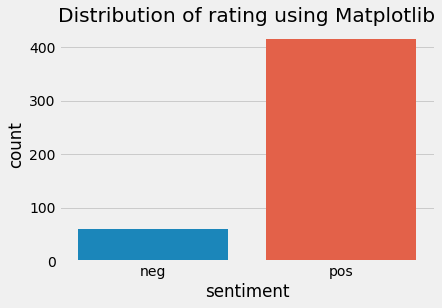

In [69]:
# PLotting Rating histogram

sns.countplot(data['sentiment'])
plt.title("Distribution of rating using Matplotlib")
plt.show()

In [71]:
from collections import Counter
cnt = Counter()
for text in data["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('love', 787),
 ('know', 346),
 ('family', 345),
 ('thank', 299),
 ('want', 268),
 ('go', 263),
 ('sorry', 260),
 ('say', 234),
 ('would', 231),
 ('like', 223)]

In [72]:
def convert_Sentiment(sentiment):
    if  sentiment == "pos":
        return 1
    elif sentiment == "neg":
        return 0
    
data.sentiment = data.sentiment.apply(lambda x : convert_Sentiment(x))

In [73]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['sentiment'], random_state = 42)

In [74]:
cv= CountVectorizer(binary=True, min_df = 10, max_df = 0.95)
cv.fit_transform(train['text'].values)
train_feature_set=cv.transform(train['text'].values)
test_feature_set=cv.transform(test['text'].values)

In [75]:
train_feature_set

<332x208 sparse matrix of type '<class 'numpy.int64'>'
	with 6365 stored elements in Compressed Sparse Row format>

In [76]:
train_feature_set.shape[1]

208

In [77]:
y_train = train['sentiment'].values
y_test = test['sentiment'].values

In [78]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [90]:
lr = LogisticRegression(random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.867
F1:  0.928


In [91]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[  2,  16],
       [  3, 122]])

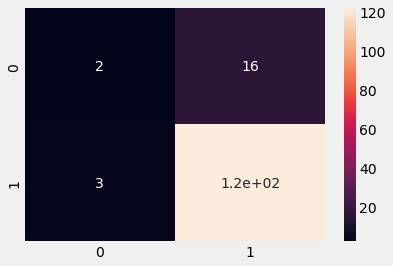

In [92]:
sns.heatmap(cm1, annot=True)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_feature_set,y_train)
y_pred = knn.predict(test_feature_set)
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.895
F1:  0.943


In [94]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[  4,  14],
       [  1, 124]])

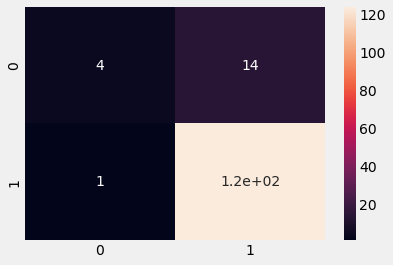

In [95]:
sns.heatmap(cm1, annot=True)

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_feature_set,y_train)
y_pred = dt.predict(test_feature_set)
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

Accuracy:  0.797
F1:  0.883


In [99]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[  5,  13],
       [ 16, 109]])

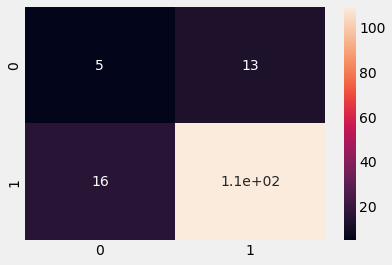

In [100]:
sns.heatmap(cm1, annot=True)

In [101]:
feature_importance = lr.coef_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  all Score:  -0.20366164602917408
Feature:  allow Score:  0.5209545290618371
Feature:  alright Score:  0.3961039596564326
Feature:  also Score:  0.3127113738436748
Feature:  always Score:  0.6090508623498573
Feature:  anyone Score:  -0.8744708295085943
Feature:  anything Score:  -0.39658197545690804
Feature:  apologize Score:  -0.21155054650999755
Feature:  appreciate Score:  0.34524229586401484
Feature:  ask Score:  0.06853207301673617


In [102]:
feature_importance = lr.coef_[0]
sorted_idx = np.argsort(feature_importance)

In [103]:
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['love', 'thank', 'ready', 'friend', 'hope', 'lord', 'strong', 'much', 'thing', 'god']


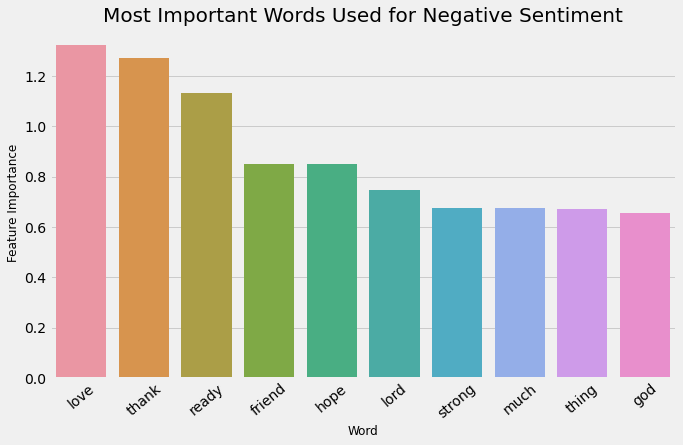

In [104]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_pos_w, y=feature_importance[sorted_idx[range(-1,-11, -1)]])
plt.title("Most Important Words Used for Positive Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [105]:
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['death', 'happen', 'die', 'one', 'anyone', 'wrong', 'heart', 'lie', 'murder', 'evil']


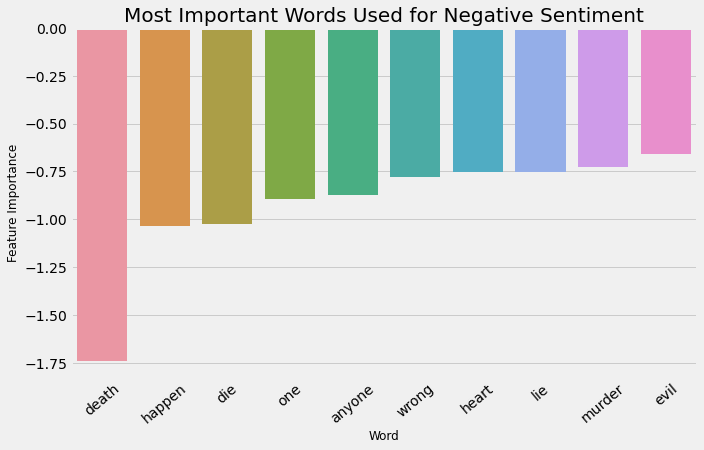

In [106]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_neg_w, y=feature_importance[sorted_idx[:10]])
plt.title("Most Important Words Used for Negative Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

In [107]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [108]:
#factorize the data i.e covert the text into numbers
sentiment_label = data.sentiment.factorize()
sentiment_label

(array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [109]:
#tokenize the sentences i.e. break them down into smaller bits
statement = data.text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(statement)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(statement)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [110]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           87424     
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 104,075
Trainable params: 104,075
Non-trainable params: 0
__________________________________________________

In [111]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.25,epochs=10,batch_size=64)

Epoch 1/10
6/6 [==============================] - 6s 557ms/step - loss: 0.6844 - accuracy: 0.7416 - val_loss: 0.6683 - val_accuracy: 0.8824
Epoch 2/10
6/6 [==============================] - 2s 305ms/step - loss: 0.6508 - accuracy: 0.8708 - val_loss: 0.6227 - val_accuracy: 0.8824
Epoch 3/10
6/6 [==============================] - 2s 307ms/step - loss: 0.5771 - accuracy: 0.8708 - val_loss: 0.4615 - val_accuracy: 0.8824
Epoch 4/10
6/6 [==============================] - 2s 298ms/step - loss: 0.4050 - accuracy: 0.8708 - val_loss: 0.3778 - val_accuracy: 0.8824
Epoch 5/10
6/6 [==============================] - 2s 299ms/step - loss: 0.3993 - accuracy: 0.8708 - val_loss: 0.3725 - val_accuracy: 0.8824
Epoch 6/10
6/6 [==============================] - 2s 295ms/step - loss: 0.3945 - accuracy: 0.8708 - val_loss: 0.3633 - val_accuracy: 0.8824
Epoch 7/10
6/6 [==============================] - 2s 297ms/step - loss: 0.3934 - accuracy: 0.8708 - val_loss: 0.3629 - val_accuracy: 0.8824
Epoch 8/10
6/6 [====

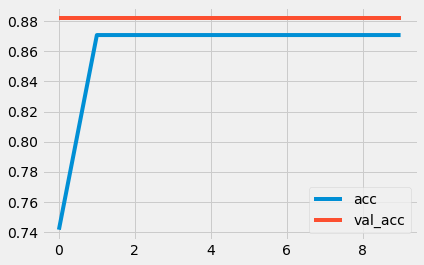

In [112]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

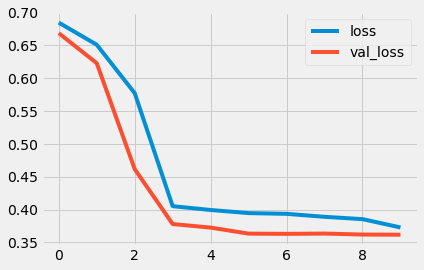

In [113]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

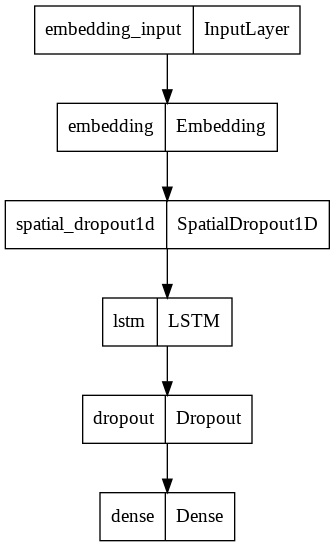

In [114]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)